# Linear Algebra Group 2 Pre finals (Juma-ang)

## Principal Component Analysis

In [53]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams

import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets


In [31]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

## PCA on the Visegard Group Companies Dataset

In [33]:
iris = datasets.load_iris()

X = iris.data

vairable_names = iris.feature_names

X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [35]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [37]:
pca.explained_variance_ratio_.sum()

1.0

In [40]:
comps = pd.DataFrame(pca.components_)
comps

,0,1,2,3
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


<Axes: >

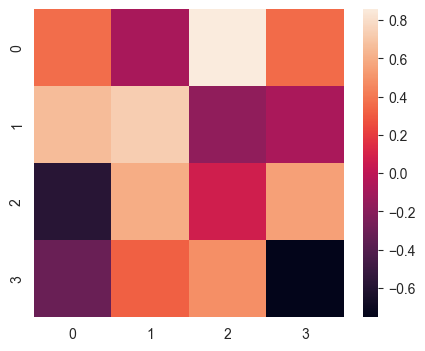

In [41]:
sb.heatmap(comps)

In [71]:
import numpy as np
import arff

data = arff.load(open("2017_Q1.arff", "rb"))

matrix = data["data"]

response = urllib.request.urlopen(url)
data = response.read().decode("utf-8")

def svd(matrix):
    num_rows, num_cols = len(matrix), len(matrix[0])

    ata = dot_product(transpose(matrix), matrix)
    aat = dot_product(matrix, transpose(matrix))

    print("A^T * A:")
    print(ata)
    print("\nA * A^T:")
    print(aat)

    eigenvalues_ata, eigenvectors_ata = np.linalg.eig(ata)

    sorted_indices = np.argsort(eigenvalues_ata)[::-1]
    eigenvalues_ata = eigenvalues_ata[sorted_indices]
    eigenvectors_ata = eigenvectors_ata[:, sorted_indices]

    singular_values = np.sqrt(eigenvalues_ata)

    v_t = eigenvectors_ata

    u = []
    for i in range(num_rows):
        u_i = dot_product(matrix, [v_t[j][i] / singular_values[j] for j in range(num_cols)])
        u.append(u_i)
    u = np.array(u).T

    print("\nU:")
    print(u)
    print("\nS:")
    print(np.diag(singular_values))
    print("\nV^T:")
    print(v_t)

    matrix = []
    for line in data.splitlines():
        matrix.append([float(x) for x in line.split()])
    svd(matrix)

FileNotFoundError: [Errno 2] No such file or directory: '2017_Q1.arff'

In [72]:
import numpy as np
def transpose(matrix):
    return [[row[i] for row in matrix] for i in range(len(matrix[0]))]

def dot_product(matrix1, matrix2):
    result_matrix = [
    [
        sum(a * b for a, b in zip(row, col))
        for col in zip(*matrix2)
    ]
    for row in matrix1
]
    return result_matrix

def scalar_multiply(matrix, scalar):
   result_matrix = [[val * scalar for val in row] for row in matrix]
   return result_matrix

def matrix_subtract(matrix1, matrix2):
    result_matrix = [
    [a - b for a, b in zip(row1, row2)]
    for row1, row2 in zip(matrix1, matrix2)
]
    
    return result_matrix

def center_data(X):
    num_rows, num_cols = len(X), len(X[0])
    mean = [sum(X[i][j] for i in range(num_rows)) / num_rows for j in range(num_cols)]
    centered_data = matrix_subtract(X, [mean])
    return centered_data, mean

def pca(X, num_components):
    centered_data, mean = center_data(X)
    transposed_data = transpose(centered_data)
    covariance_matrix = dot_product(transposed_data, centered_data)
    covariance_matrix = scalar_multiply(covariance_matrix, 1 / (len(centered_data[0]) - 1))

    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    sorted_indices = sorted(range(len(eigenvalues)), key=lambda k: eigenvalues[k], reverse=True)
    eigenvalues = [eigenvalues[i] for i in sorted_indices]
    eigenvectors = [eigenvectors[:, i] for i in sorted_indices]
    
    principal_components = eigenvectors[:num_components]
    pca_result = dot_product(centered_data, transpose(principal_components))

    return pca_result, eigenvalues, principal_components, mean
num_components = 8

pca_result, _, _, _ = pca(data, num_components)

print("Principal Component Analysis:")
print(pca_result)

TypeError: unsupported operand type(s) for +: 'int' and 'str'